## Fandango Movie Ratings

Investigating Fandango movie ratings system to determine whether there has been any change after Hickey's analysis which claimed that ratings are being inflated.

New goal(proxy): Determine if there's any change with movie ratings of popular movies before and after Hickey's analysis.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [2]:
#read in data before and after Hickey's analysis
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')
fandango_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_after = after[['movie', 'year', 'fandango']]
print(before.info())
print(after.info())
before.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,2.50,3.40,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,2.65,3.80,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,4.05,3.40,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,4.05,4.40,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,4.00,4.25,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [3]:
after.head(20)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5
8,Allied,2016,60,7.1,61,66,4.0,3.00,3.55,3.05,3.30,3.0,3.5,3.0,3.5
9,Amateur Night,2016,38,5.0,0,27,3.5,1.90,2.50,0.00,1.35,2.0,2.5,0.0,1.5


The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

The before data is not representative of the population because it excludes movies without tickets sales or has less than 30 fan ratings.

The after data is also not representative of the population because it only includes data for movies with most number of votes (number not explicit in the readme file) during the 2016-2017 period.

Both samples are also subject to temporal trends.

Therefore, sampling is not random in both samples.

In [4]:
#using 30 fan ratings or more as a benchmark
fandango_before.Fandango_votes.value_counts().sort_index()
#sum(fandango_before['Fandango_votes'] < 30)

#for the after sample, sample 10 and check the website for # of fan ratings
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Move forward since 90% of the sample has 30 fan ratings or more according to the website.

In [5]:
#isolate films from 2015 and 2016
movies_2015 = fandango_before.FILM.str.contains("2015")
fandango_2015 = fandango_before[movies_2015]

fandango_2016 = fandango_after.loc[fandango_after['year'] == 2016]
fandango_2016.sample(10)

,movie,year,fandango
63,Gods of Egypt,2016,3.5
21,Before the Flood,2016,3.5
206,Warcraft,2016,4.0
38,Criminal,2016,4.0
117,Morgan,2016,3.5
26,Blood Father,2016,4.0
66,"Hail, Caesar!",2016,2.5
132,Pete's Dragon,2016,4.5
5,A Monster Calls,2016,4.0
80,Inferno,2016,3.5


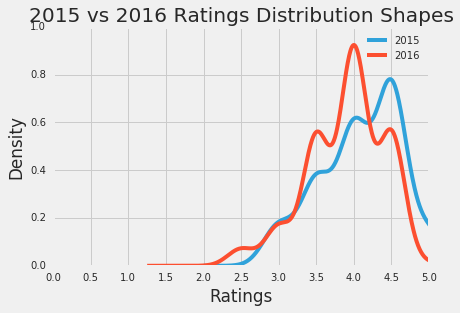

In [23]:
#kde plot

plt.style.use('fivethirtyeight')
fandango_2015.Fandango_Stars.plot.kde(label="2015", legend=True)
fandango_2016.fandango.plot.kde(label="2016", legend=True)
plt.title("2015 vs 2016 Ratings Distribution Shapes")
plt.xlim(0,5)
plt.xticks(np.arange(0,5.5,.5))
plt.xlabel("Ratings")

Both distributions are strongly left skewed.
The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

In [27]:
#relative frequencies

fandango_2015.Fandango_Stars.value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [28]:
fandango_2016.fandango.value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [57]:
#descriptors
mean_2015 = fandango_2015.Fandango_Stars.mean()
mean_2016 = fandango_2016.fandango.mean()
median_2015 = fandango_2015.Fandango_Stars.median()
median_2016 = fandango_2016.fandango.median()
mode_2015 = fandango_2015.Fandango_Stars.mode()[0]
mode_2016 = fandango_2016.fandango.mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015,median_2015,mode_2015]
summary['2016'] = [mean_2016,median_2016,mode_2016]
summary['name'] = ["mean","median","mode"]
summary.set_index('name', inplace=True)
#summary_melt = pd.melt(summary, id_vars='name', value_vars=['2015','2016'])
summary

,2015,2016
name,,
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1468: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



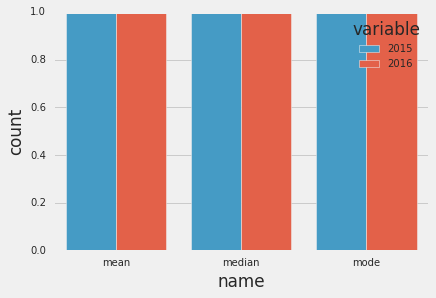

In [55]:
sns.countplot(x='name', data=summary_melt, hue='variable')

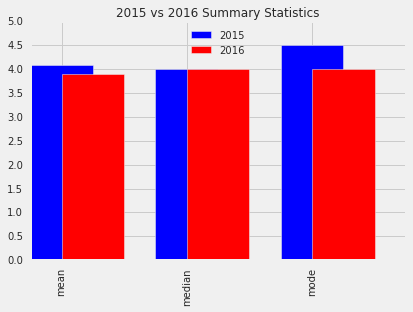

In [72]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color="blue", align='center', label='2015', legend=True)
summary['2016'].plot.bar(color="red", align='edge', label='2016',legend=True)
plt.legend(loc="upper center")
plt.ylim(0,5)
plt.yticks(np.arange(0,5.5,.5))
plt.xlabel("")
plt.title("2015 vs 2016 Summary Statistics", size=12)

The analysis showed that there is a slight difference between 2015 and 2016 ratings of popular movies in Fandango's website. On average, 2016 popular movies were rated slightly lower than in 2015.

It is very likely that this change occured due to Hickey's analysis.